In [1]:
%pip install pandas
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
df = pd.read_csv('./datasets/house.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
def get_summary(df):
    summary = []
    for col in df.columns:
        isNullCount = df[col].isnull().sum()
        totalRows = df[col].shape[0]
        percentage = isNullCount / totalRows * 100
        uniqueCount = df[col].nunique()

        # Conditional logic for UniqueItems
        if df[col].dtype == 'object':  # Non-numeric column
            uniqueItems = df[col].unique() if uniqueCount <= 30 else f"{uniqueCount}(too many to list)"
        else:
            uniqueItems = "N/A as numeric"  # Placeholder for numeric columns

        summary.append({
            'ColumnName': col,
            'NullCount': isNullCount,
            'TotalRows': totalRows,
            'Percentage': round(percentage, 2),
            'UniqueValues': uniqueCount,
            'UniqueItems': uniqueItems,
            'dataType': df[col].dtype
        })

    pd.set_option('display.max_rows', None)
    df_summary = pd.DataFrame(summary)

    # Set display options to show full content of UniqueItems column
    pd.set_option('display.max_colwidth', None)

    return df_summary

In [6]:
get_summary(df)

,ColumnName,NullCount,TotalRows,Percentage,UniqueValues,UniqueItems,dataType
0,Id,0,1460,0.00,1460,N/A as numeric,int64
1,MSSubClass,0,1460,0.00,15,N/A as numeric,int64
2,MSZoning,0,1460,0.00,5,"[RL, RM, C (all), FV, RH]",object
3,LotFrontage,259,1460,17.74,110,N/A as numeric,float64
4,LotArea,0,1460,0.00,1073,N/A as numeric,int64
5,Street,0,1460,0.00,2,"[Pave, Grvl]",object
6,Alley,1369,1460,93.77,2,"[nan, Grvl, Pave]",object
7,LotShape,0,1460,0.00,4,"[Reg, IR1, IR2, IR3]",object
8,LandContour,0,1460,0.00,4,"[Lvl, Bnk, Low, HLS]",object
9,Utilities,0,1460,0.00,2,"[AllPub, NoSeWa]",object


In [7]:
# remove PoolQC, MiscFeature, Alley as almost 93%+ of data are null (if it already exists)
# df.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace=True)

def isColumnExist(df, column):
  if column in df.columns:
    return True
  else:
    return False

def removeColumn(df, column):
  if isColumnExist(df, column):
   df = df.drop(column, axis=1, inplace=True)


In [8]:
# check percentage >= 45 and remove those

summary = get_summary(df)

for col in df.columns:
  percentageVal = summary[summary['ColumnName'] == col]['Percentage'].values[0]
  if percentageVal >= 45:
    removeColumn(df, col)
    print("removed column {} as {}% of data are null".format(col,percentageVal))

df.shape

removed column Alley as 93.77% of data are null
removed column MasVnrType as 59.73% of data are null
removed column FireplaceQu as 47.26% of data are null
removed column PoolQC as 99.52% of data are null
removed column Fence as 80.75% of data are null
removed column MiscFeature as 96.3% of data are null


(1460, 75)

In [9]:
# show all the unique values which has 2 unique values
for col in df.columns:
  if df[col].nunique() == 2:
    print("{} = {}".format(col,df[col].unique()))


Street = ['Pave' 'Grvl']
Utilities = ['AllPub' 'NoSeWa']
CentralAir = ['Y' 'N']


In [10]:
# now only work with non-numeric columns

# make another df2 with non-numeric columns
df2 = df.select_dtypes(exclude=['int64', 'float64'])
df2.head()
get_summary(df2)


,ColumnName,NullCount,TotalRows,Percentage,UniqueValues,UniqueItems,dataType
0,MSZoning,0,1460,0.00,5,"[RL, RM, C (all), FV, RH]",object
1,Street,0,1460,0.00,2,"[Pave, Grvl]",object
2,LotShape,0,1460,0.00,4,"[Reg, IR1, IR2, IR3]",object
3,LandContour,0,1460,0.00,4,"[Lvl, Bnk, Low, HLS]",object
4,Utilities,0,1460,0.00,2,"[AllPub, NoSeWa]",object
5,LotConfig,0,1460,0.00,5,"[Inside, FR2, Corner, CulDSac, FR3]",object
6,LandSlope,0,1460,0.00,3,"[Gtl, Mod, Sev]",object
7,Neighborhood,0,1460,0.00,25,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, Somerst, NWAmes, OldTown, BrkSide, Sawyer, NridgHt, NAmes, SawyerW, IDOTRR, MeadowV, Edwards, Timber, Gilbert, StoneBr, ClearCr, NPkVill, Blmngtn, BrDale, SWISU, Blueste]",object
8,Condition1,0,1460,0.00,9,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, PosA, RRNe]",object
9,Condition2,0,1460,0.00,8,"[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, RRAe]",object


In [11]:
# we will do encoding

# here is a fact, if we see too many unique then we can apply binary encoding

summary = get_summary(df2)

#sort summary by UniqueValues column
summary = summary.sort_values(by='UniqueValues', ascending=False)


summary


,ColumnName,NullCount,TotalRows,Percentage,UniqueValues,UniqueItems,dataType
7,Neighborhood,0,1460,0.00,25,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, Somerst, NWAmes, OldTown, BrkSide, Sawyer, NridgHt, NAmes, SawyerW, IDOTRR, MeadowV, Edwards, Timber, Gilbert, StoneBr, ClearCr, NPkVill, Blmngtn, BrDale, SWISU, Blueste]",object
15,Exterior2nd,0,1460,0.00,16,"[VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, Wd Sdng, CmentBd, BrkFace, Stucco, AsbShng, Brk Cmn, ImStucc, AsphShn, Stone, Other, CBlock]",object
14,Exterior1st,0,1460,0.00,15,"[VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, WdShing, CemntBd, Plywood, AsbShng, Stucco, BrkComm, AsphShn, Stone, ImStucc, CBlock]",object
35,SaleType,0,1460,0.00,9,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, Oth]",object
8,Condition1,0,1460,0.00,9,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, PosA, RRNe]",object
9,Condition2,0,1460,0.00,8,"[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, RRAe]",object
11,HouseStyle,0,1460,0.00,8,"[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl, 2.5Unf, 2.5Fin]",object
13,RoofMatl,0,1460,0.00,8,"[CompShg, WdShngl, Metal, WdShake, Membran, Tar&Grv, Roll, ClyTile]",object
29,Functional,0,1460,0.00,7,"[Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]",object
18,Foundation,0,1460,0.00,6,"[PConc, CBlock, BrkTil, Wood, Slab, Stone]",object


In [12]:
summary.shape

(37, 7)

In [13]:
# the top 3 columns having a larger unique Value, so we can use BinaryEncoding here
binaryEncodingColumns = summary.head(4)['ColumnName'].values
binaryEncodingColumns

array(['Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType'],
      dtype=object)

In [14]:
binary_df = df2[binaryEncodingColumns]
binary_df.head()

,Neighborhood,Exterior2nd,Exterior1st,SaleType
0,CollgCr,VinylSd,VinylSd,WD
1,Veenker,MetalSd,MetalSd,WD
2,CollgCr,VinylSd,VinylSd,WD
3,Crawfor,Wd Shng,Wd Sdng,WD
4,NoRidge,VinylSd,VinylSd,WD


In [15]:
# still having some rows we can see the top most rows and their uniques

#range loop
for i in range(4):
  #each i'th column of non_null_summary [name - NullCount - Uniques]
  item = summary.iloc[i]
  columnName = item['ColumnName']
  nullCount = item['NullCount']
  unique = df[columnName].nunique()
  typ = df[columnName].dtype
  print("{} , {}, {}, {}".format(columnName, nullCount, unique, typ))

Neighborhood , 0, 25, object
Exterior2nd , 0, 16, object
Exterior1st , 0, 15, object
SaleType , 0, 9, object


In [16]:
# we can do here binary encoding, as the null values also for these 3 are 0 so we don't need to fillna

%pip install category_encoders
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=binaryEncodingColumns, return_df=True)
binary_encoded_df = encoder.fit_transform(binary_df)
# print(binary_encoded_df.head())
# print(binary_encoded_df.shape)
binary_encoded_df.head()


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,SaleType_0,SaleType_1,SaleType_2,SaleType_3
0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [17]:
# the ordinal columns
ordinal_cols = ['Functional','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond', 'BsmtFinType1', 'BsmtFinType2']


# summary of only ordinal_cols
ordinal_summary = summary[summary['ColumnName'].isin(ordinal_cols)]
ordinal_summary

,ColumnName,NullCount,TotalRows,Percentage,UniqueValues,UniqueItems,dataType
29,Functional,0,1460,0.00,7,"[Typ, Min1, Maj1, Min2, Mod, Maj2, Sev]",object
23,BsmtFinType2,38,1460,2.60,6,"[Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]",object
22,BsmtFinType1,37,1460,2.53,6,"[GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]",object
33,GarageCond,81,1460,5.55,5,"[TA, Fa, nan, Gd, Po, Ex]",object
32,GarageQual,81,1460,5.55,5,"[TA, Fa, Gd, nan, Ex, Po]",object
25,HeatingQC,0,1460,0.00,5,"[Ex, Gd, TA, Fa, Po]",object
17,ExterCond,0,1460,0.00,5,"[TA, Gd, Fa, Po, Ex]",object
20,BsmtCond,37,1460,2.53,4,"[TA, Gd, nan, Fa, Po]",object
16,ExterQual,0,1460,0.00,4,"[Gd, TA, Ex, Fa]",object
19,BsmtQual,37,1460,2.53,4,"[Gd, TA, Ex, nan, Fa]",object


In [18]:
# shape of ordinal summary
ordinal_summary.shape

(11, 7)

In [19]:

# we can easily apply the Ordinal Encoding here,
# we can map each column with ordinal precedence
# we add missing here as 0 (we'll replace nan with this missing)

ordinal_mappings = {
    'BsmtFinType1':{'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'Missing': 0},
    'BsmtFinType2':{'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'Missing': 0},
    'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1},
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Missing': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Missing': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Missing': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'Missing': 0}
}

In [20]:
#Our function that will apply ORDINAL_ENCODING based on our previous map

def apply_ordinal_encoding(dff, ordinal_cols, ordinal_mappings):
  for col in ordinal_cols:
        # Replace NaN with 'Missing'
        dff[col].fillna('Missing', inplace=True)

        # Apply the mapping for the current column
        dff[col] = dff[col].map(ordinal_mappings[col])

        # Handle unmapped categories by filling with 0
        if dff[col].isnull().any():
            print(f"Warning: Unmapped categories found in column {col}. Filling with 0.")
            dff[col].fillna(0, inplace=True)  # Assign 0 to unmapped categories

  return dff

In [21]:
#ordinal column's df
ordinal_df = df2[ordinal_cols]
ordinal_df.head()

,Functional,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,BsmtFinType1,BsmtFinType2
0,Typ,Gd,TA,Gd,TA,Ex,Gd,TA,TA,GLQ,Unf
1,Typ,TA,TA,Gd,TA,Ex,TA,TA,TA,ALQ,Unf
2,Typ,Gd,TA,Gd,TA,Ex,Gd,TA,TA,GLQ,Unf
3,Typ,TA,TA,TA,Gd,Gd,Gd,TA,TA,ALQ,Unf
4,Typ,Gd,TA,Gd,TA,Ex,Gd,TA,TA,GLQ,Unf


In [22]:
# now pass the df (binary_encoded_df because it already have binary encoded values)
ordinal_encoded_df = apply_ordinal_encoding(ordinal_df, ordinal_cols, ordinal_mappings)
ordinal_encoded_df.head()

,Functional,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond,BsmtFinType1,BsmtFinType2
0,7,4,3,4,3,5,4,3,3,6,1
1,7,3,3,4,3,5,3,3,3,5,1
2,7,4,3,4,3,5,4,3,3,6,1
3,7,3,3,3,4,4,4,3,3,5,1
4,7,4,3,4,3,5,4,3,3,6,1


In [23]:
ordinal_encoded_df.shape

(1460, 11)

In [24]:
ordinal_encoded_df.shape[1] + binary_encoded_df.shape[1]

29

In [25]:
#now we can see all are good to go.

already_encoded_columns = ordinal_cols + binaryEncodingColumns.tolist()
print('Already Encoded Columns are = {}'.format(len(already_encoded_columns)))

# now we check which columns are still need to be encoded
# exclude already_encoded_columns from df2
non_encoded_columns = [col for col in df2.columns if col not in already_encoded_columns]
print('Non Encoded Columns are = {}'.format(len(non_encoded_columns)))

Already Encoded Columns are = 15
Non Encoded Columns are = 22


In [26]:
df3 = df2[non_encoded_columns]
summary = get_summary(df3)
#sort summary by UniqueValues column
summary = summary.sort_values(by='UniqueValues', ascending=False)


summary

,ColumnName,NullCount,TotalRows,Percentage,UniqueValues,UniqueItems,dataType
7,Condition1,0,1460,0.00,9,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, PosA, RRNe]",object
8,Condition2,0,1460,0.00,8,"[Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, RRAe]",object
12,RoofMatl,0,1460,0.00,8,"[CompShg, WdShngl, Metal, WdShake, Membran, Tar&Grv, Roll, ClyTile]",object
10,HouseStyle,0,1460,0.00,8,"[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl, 2.5Unf, 2.5Fin]",object
11,RoofStyle,0,1460,0.00,6,"[Gable, Hip, Gambrel, Mansard, Flat, Shed]",object
18,GarageType,81,1460,5.55,6,"[Attchd, Detchd, BuiltIn, CarPort, nan, Basment, 2Types]",object
15,Heating,0,1460,0.00,6,"[GasA, GasW, Grav, Wall, OthW, Floor]",object
13,Foundation,0,1460,0.00,6,"[PConc, CBlock, BrkTil, Wood, Slab, Stone]",object
21,SaleCondition,0,1460,0.00,6,"[Normal, Abnorml, Partial, AdjLand, Alloca, Family]",object
9,BldgType,0,1460,0.00,5,"[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]",object


In [27]:
# we see still the top columns (Condtion1, Condition2, RoofMatl, HouseStyle) has 9/8 unique values
# we can use one-hot but since binary-encoding can reduce dimensions

another_bin_encode_columns = ['Condition1', 'Condition2', 'RoofMatl', 'HouseStyle']

binary_df2 = df3[another_bin_encode_columns]

encoder = ce.BinaryEncoder(cols=another_bin_encode_columns, return_df=True)
binary_encoded_df2 = encoder.fit_transform(binary_df2)
binary_encoded_df2.head()

,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition2_0,Condition2_1,Condition2_2,Condition2_3,RoofMatl_0,RoofMatl_1,RoofMatl_2,RoofMatl_3,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3
0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1


In [28]:
# we can now check other existing columns
already_encoded_columns +=  another_bin_encode_columns
print("Already Encoded Columns are = {}".format(len(already_encoded_columns)))

# now without these we will perform
non_existing_columns = [col for col in df2.columns if col not in already_encoded_columns]
non_existing_columns

Already Encoded Columns are = 19


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'RoofStyle',
 'Foundation',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleCondition']

In [29]:
print("Null counts before imputation:")
print(df2[non_existing_columns].isnull().sum())

Null counts before imputation:
MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
BldgType          0
RoofStyle         0
Foundation        0
BsmtExposure     38
Heating           0
CentralAir        0
Electrical        1
GarageType       81
GarageFinish     81
PavedDrive        0
SaleCondition     0
dtype: int64


In [30]:
df4 = df2[non_existing_columns].fillna('Missing')

In [31]:
print("\nNull counts after imputation:")
print(df4.isnull().sum())


Null counts after imputation:
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
BldgType         0
RoofStyle        0
Foundation       0
BsmtExposure     0
Heating          0
CentralAir       0
Electrical       0
GarageType       0
GarageFinish     0
PavedDrive       0
SaleCondition    0
dtype: int64


In [32]:
# we will apply one-hot-encoding here
one_hot_encoded_df = pd.get_dummies(df4, drop_first=True, prefix=non_existing_columns, prefix_sep=' ', dtype=int)
one_hot_encoded_df.head()

,MSZoning FV,MSZoning RH,MSZoning RL,MSZoning RM,Street Pave,LotShape IR2,LotShape IR3,LotShape Reg,LandContour HLS,LandContour Low,...,GarageFinish Missing,GarageFinish RFn,GarageFinish Unf,PavedDrive P,PavedDrive Y,SaleCondition AdjLand,SaleCondition Alloca,SaleCondition Family,SaleCondition Normal,SaleCondition Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [33]:
already_encoded_columns += non_existing_columns
print("Already Encoded Columns are = {}".format(len(already_encoded_columns)))

Already Encoded Columns are = 37


In [34]:
binary_encoded_df.isnull().sum()

Neighborhood_0    0
Neighborhood_1    0
Neighborhood_2    0
Neighborhood_3    0
Neighborhood_4    0
Exterior2nd_0     0
Exterior2nd_1     0
Exterior2nd_2     0
Exterior2nd_3     0
Exterior2nd_4     0
Exterior1st_0     0
Exterior1st_1     0
Exterior1st_2     0
Exterior1st_3     0
SaleType_0        0
SaleType_1        0
SaleType_2        0
SaleType_3        0
dtype: int64

In [35]:
ordinal_encoded_df.isnull().sum()

Functional      0
ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
HeatingQC       0
KitchenQual     0
GarageQual      0
GarageCond      0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

In [36]:
one_hot_encoded_df.isnull().sum()

MSZoning FV              0
MSZoning RH              0
MSZoning RL              0
MSZoning RM              0
Street Pave              0
LotShape IR2             0
LotShape IR3             0
LotShape Reg             0
LandContour HLS          0
LandContour Low          0
LandContour Lvl          0
Utilities NoSeWa         0
LotConfig CulDSac        0
LotConfig FR2            0
LotConfig FR3            0
LotConfig Inside         0
LandSlope Mod            0
LandSlope Sev            0
BldgType 2fmCon          0
BldgType Duplex          0
BldgType Twnhs           0
BldgType TwnhsE          0
RoofStyle Gable          0
RoofStyle Gambrel        0
RoofStyle Hip            0
RoofStyle Mansard        0
RoofStyle Shed           0
Foundation CBlock        0
Foundation PConc         0
Foundation Slab          0
Foundation Stone         0
Foundation Wood          0
BsmtExposure Gd          0
BsmtExposure Missing     0
BsmtExposure Mn          0
BsmtExposure No          0
Heating GasA             0
H

In [37]:
binary_encoded_df2.isnull().sum()

Condition1_0    0
Condition1_1    0
Condition1_2    0
Condition1_3    0
Condition2_0    0
Condition2_1    0
Condition2_2    0
Condition2_3    0
RoofMatl_0      0
RoofMatl_1      0
RoofMatl_2      0
RoofMatl_3      0
HouseStyle_0    0
HouseStyle_1    0
HouseStyle_2    0
HouseStyle_3    0
dtype: int64

In [38]:
# Combine all encoded parts into a single DataFrame
final_df = pd.concat([binary_encoded_df, ordinal_encoded_df, one_hot_encoded_df, binary_encoded_df2], axis=1)

# Display the final dataset
print("Final Dataset Shape:", final_df.shape)
print("Final Dataset Columns:", final_df.columns.tolist())

Final Dataset Shape: (1460, 108)
Final Dataset Columns: ['Neighborhood_0', 'Neighborhood_1', 'Neighborhood_2', 'Neighborhood_3', 'Neighborhood_4', 'Exterior2nd_0', 'Exterior2nd_1', 'Exterior2nd_2', 'Exterior2nd_3', 'Exterior2nd_4', 'Exterior1st_0', 'Exterior1st_1', 'Exterior1st_2', 'Exterior1st_3', 'SaleType_0', 'SaleType_1', 'SaleType_2', 'SaleType_3', 'Functional', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond', 'BsmtFinType1', 'BsmtFinType2', 'MSZoning FV', 'MSZoning RH', 'MSZoning RL', 'MSZoning RM', 'Street Pave', 'LotShape IR2', 'LotShape IR3', 'LotShape Reg', 'LandContour HLS', 'LandContour Low', 'LandContour Lvl', 'Utilities NoSeWa', 'LotConfig CulDSac', 'LotConfig FR2', 'LotConfig FR3', 'LotConfig Inside', 'LandSlope Mod', 'LandSlope Sev', 'BldgType 2fmCon', 'BldgType Duplex', 'BldgType Twnhs', 'BldgType TwnhsE', 'RoofStyle Gable', 'RoofStyle Gambrel', 'RoofStyle Hip', 'RoofStyle Mansard', 'RoofStyle Shed', 'Foundation 

In [39]:
# Check for missing values
print("Missing Values in Final Dataset:")
print(final_df.isnull().sum())

# Check the first few rows of the final dataset
# print(final_df.head())

Missing Values in Final Dataset:
Neighborhood_0           0
Neighborhood_1           0
Neighborhood_2           0
Neighborhood_3           0
Neighborhood_4           0
Exterior2nd_0            0
Exterior2nd_1            0
Exterior2nd_2            0
Exterior2nd_3            0
Exterior2nd_4            0
Exterior1st_0            0
Exterior1st_1            0
Exterior1st_2            0
Exterior1st_3            0
SaleType_0               0
SaleType_1               0
SaleType_2               0
SaleType_3               0
Functional               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
HeatingQC                0
KitchenQual              0
GarageQual               0
GarageCond               0
BsmtFinType1             0
BsmtFinType2             0
MSZoning FV              0
MSZoning RH              0
MSZoning RL              0
MSZoning RM              0
Street Pave              0
LotShape IR2             0
LotShape IR3          

In [40]:
# we check the numeric_columns from the df

numeric_cols = []
for col in df.columns:
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    numeric_cols.append(col)

print(numeric_cols, len(numeric_cols))


# check if null here fofr these cols from df2
numeric_cols_df = df[numeric_cols]
numeric_cols_df.head()

#null exists?
summary = get_summary(numeric_cols_df)
summary.sort_values(by='NullCount', ascending=False)


['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 38


,ColumnName,NullCount,TotalRows,Percentage,UniqueValues,UniqueItems,dataType
2,LotFrontage,259,1460,17.74,110,N/A as numeric,float64
25,GarageYrBlt,81,1460,5.55,97,N/A as numeric,float64
8,MasVnrArea,8,1460,0.55,327,N/A as numeric,float64
0,Id,0,1460,0.00,1460,N/A as numeric,int64
29,OpenPorchSF,0,1460,0.00,202,N/A as numeric,int64
22,KitchenAbvGr,0,1460,0.00,4,N/A as numeric,int64
23,TotRmsAbvGrd,0,1460,0.00,12,N/A as numeric,int64
24,Fireplaces,0,1460,0.00,4,N/A as numeric,int64
26,GarageCars,0,1460,0.00,5,N/A as numeric,int64
27,GarageArea,0,1460,0.00,441,N/A as numeric,int64


In [41]:
total_df = pd.concat([final_df, numeric_cols_df], axis=1)
total_df.head()

summary = get_summary(total_df)
summary.sort_values(by='NullCount', ascending=False)

,ColumnName,NullCount,TotalRows,Percentage,UniqueValues,UniqueItems,dataType
110,LotFrontage,259,1460,17.74,110,N/A as numeric,float64
133,GarageYrBlt,81,1460,5.55,97,N/A as numeric,float64
116,MasVnrArea,8,1460,0.55,327,N/A as numeric,float64
99,Condition2_3,0,1460,0.00,2,N/A as numeric,int64
93,Condition1_1,0,1460,0.00,2,N/A as numeric,int64
94,Condition1_2,0,1460,0.00,2,N/A as numeric,int64
95,Condition1_3,0,1460,0.00,2,N/A as numeric,int64
96,Condition2_0,0,1460,0.00,2,N/A as numeric,int64
97,Condition2_1,0,1460,0.00,2,N/A as numeric,int64
98,Condition2_2,0,1460,0.00,2,N/A as numeric,int64


In [42]:
%pip install matplotlib
import matplotlib.pyplot as plt

def plot_residuals(model, X_val, Y_val, col):
    predictions = model.predict(X_val)
    residuals = Y_val - predictions

    plt.scatter(predictions, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot for {col}")
    plt.show()



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [43]:
#we see there are top 3 columns having null values, we also need to perform action here

# we split the data into non_null_data, then split that into 70-30 for test-train and make model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def impute_missing_values(df, col, features):
  non_null = df[df[col].notnull()]
  null = df[df[col].isnull()]

  X = non_null[features]
  Y = non_null[col]

  X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
  X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

  model = RandomForestRegressor(n_estimators=100, random_state=42)
  model.fit(X_train, Y_train)
  plot_residuals(model, X_val, Y_val, col)

  val_score = model.score(X_val, Y_val)
  test_score = model.score(X_test, Y_test)
  print(f"Validation score for {col}: {val_score}")
  print(f"Test score for {col}: {test_score}")


  if not null.empty:
    null_features = null[features]
    null_predictions = model.predict(null_features)
    df.loc[df[col].isnull(), col] = null_predictions

  return df


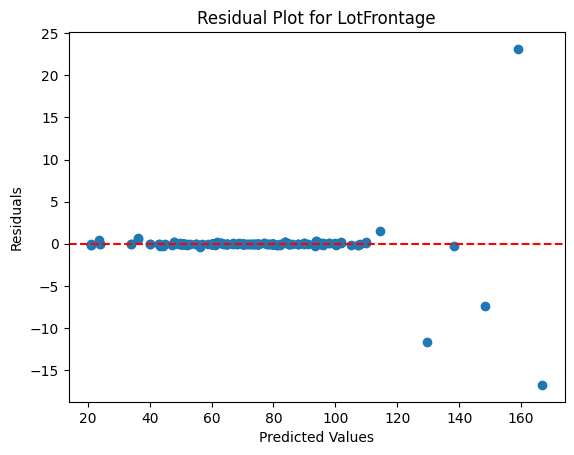

Validation score for LotFrontage: 0.9896360621757413
Test score for LotFrontage: 0.9990534366080998


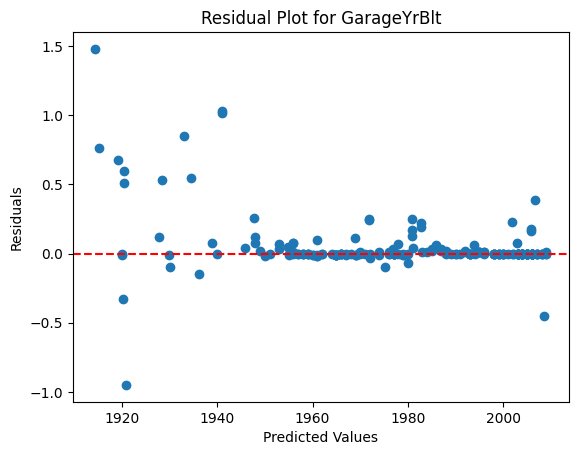

Validation score for GarageYrBlt: 0.9999258804502118
Test score for GarageYrBlt: 0.9991768711164951


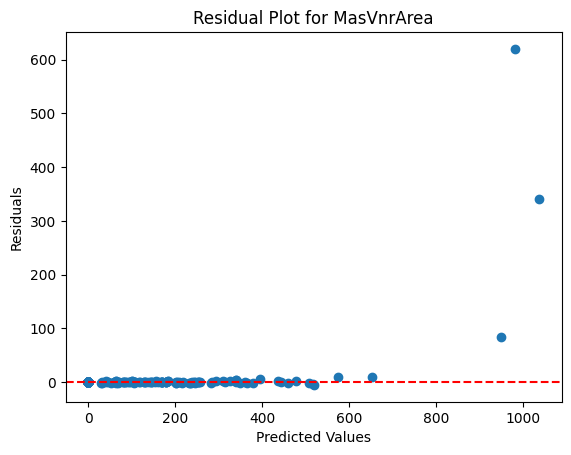

Validation score for MasVnrArea: 0.9418438511680016
Test score for MasVnrArea: 0.9952881018573696
Neighborhood_0           0
Neighborhood_1           0
Neighborhood_2           0
Neighborhood_3           0
Neighborhood_4           0
Exterior2nd_0            0
Exterior2nd_1            0
Exterior2nd_2            0
Exterior2nd_3            0
Exterior2nd_4            0
Exterior1st_0            0
Exterior1st_1            0
Exterior1st_2            0
Exterior1st_3            0
SaleType_0               0
SaleType_1               0
SaleType_2               0
SaleType_3               0
Functional               0
ExterQual                0
ExterCond                0
BsmtQual                 0
BsmtCond                 0
HeatingQC                0
KitchenQual              0
GarageQual               0
GarageCond               0
BsmtFinType1             0
BsmtFinType2             0
MSZoning FV              0
MSZoning RH              0
MSZoning RL              0
MSZoning RM              0
Street Pave

In [44]:
#from total df we saw 3 are null,
numeric_null = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for col in numeric_null:
  total_df = impute_missing_values(total_df, col, numeric_cols)


print(total_df.isnull().sum())



In [45]:
# now from the total_df we can do our prediction model as this is holding only numerics

#check total_df has SalePrice column or not
test_df = total_df.copy()
if 'SalePrice' in test_df.columns:
  test_df.drop('SalePrice', axis=1, inplace=True)



In [46]:
Y = total_df['SalePrice']
X = test_df

In [47]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)


# scores
val_score = model.score(X_val, Y_val)
test_score = model.score(X_test, Y_test)
model_score = model.score(X, Y)
print(f"Validation score: {val_score}")
print(f"Test score: {test_score}")
print(f"Model score: {model_score}")


Validation score: 0.9031974213047256
Test score: 0.8602348078412798
Model score: 0.8929046927924801


In [48]:
df.to_csv('../ml/datasets/house_encoded.csv', index=False)